# Praca domowa nr 3

Analiza wybranych forum Stack Exchange:

* matematyka        
* fizyka  
* elektronika 
* polityka
* filozofia
* historia
* judaizm
* chrzescijanstwo
* islam

In [2]:
# import danych

import pandas as pd
import numpy as np
import os
import xml.etree.ElementTree as ET
import csv

#rootdir = os.path.join(os.getcwd(), "files")
rootdir = '/home/kasia/Pulpit/studia_MINI/Python/praca_domowa3/data'

badges_fields = ["Id", "UserId", "Name", "Date", "Class", "TagBased"]
users_fields = ["Id", "Reputation", "CreationDate", "DisplayName", "LastAccessDate", "WebsiteUrl","Location","AboutMe","Views","UpVotes","DownVotes","AccountId"]
posts_fields = ["Id", "PostTypeId", "AcceptedAnswerId","CreationDate", "Score", "ViewCount", "Body","OwnerUserId","LastEditorUserId","LastEditDate","LastActivityDate","Title","Tags","AnswerCount","CommentCount","FavouriteCount"]
comments_fields = ["Id", "PostId", "Score", "Text", "CreationDate", "UserId"]
votes_fields = ["Id", "PostId", "VoteTypeId", "CreationDate"]
postHistory_fields = ["Id", "PostHistoryTypeId", "PostId", "RevisionGUID", "CreationDate", "UserId","Text"]
tags_fields = ["Id", "TagName", "Count", "ExcerptPostId", "WikiPostId"]
postLinks_fields = ["Id", "CreationDate", "PostId", "RelatedPostId", "LinkTypeId"]


for subdir, dirs, files in os.walk(rootdir):
    for directory in dirs:
        if directory != None and not os.path.exists(directory):
            os.mkdir(directory)
    for file in files:
        filename, _ = os.path.splitext(file)
        folder = os.path.basename(subdir)
        
        csv_fname = folder+"_"+filename+".csv"
        print(csv_fname+" is starting created")
        
        with open(os.path.join(folder, csv_fname), mode="w", encoding="utf-8") as csvfile:
            
            if filename == "Posts":
                fieldnames=posts_fields
                writer = csv.DictWriter(csvfile, fieldnames=posts_fields)
            if filename == "Badges":
                fieldnames=badges_fields
                writer = csv.DictWriter(csvfile, fieldnames=badges_fields)
            if filename == "Users":
                fieldnames=users_fields
                writer = csv.DictWriter(csvfile, fieldnames=users_fields)
            if filename == "Tags":
                fieldnames=tags_fields
                writer = csv.DictWriter(csvfile, fieldnames=tags_fields)
            if filename == "Votes":
                fieldnames=votes_fields
                writer = csv.DictWriter(csvfile, fieldnames=votes_fields)
            if filename == "Comments":
                fieldnames=comments_fields
                writer = csv.DictWriter(csvfile, fieldnames=comments_fields)
            if filename == "PostHistory":
                fieldnames=postHistory_fields
                writer = csv.DictWriter(csvfile, fieldnames=postHistory_fields)    
            if filename == "PostLinks":
                fieldnames=postLinks_fields
                writer = csv.DictWriter(csvfile, fieldnames=postLinks_fields)    
            writer.writeheader()
            
            xml = os.path.join(subdir, file)
            context = ET.iterparse(xml)
            
            filled_row = {}
            context = iter(context)
            i=0
            k=0
            for event, elem in context:
                if elem.tag == 'row':
                    for head in fieldnames:
                        try:
                            filled_row.update({head : elem.attrib[head]})
                        except:
                            filled_row.update({head : np.nan})        
                    writer.writerow(filled_row)
                    i=i+1;
                    if i>100000:
                        #print(k)
                        k=k+1
                        i=0
                elem.clear()
                del elem
        print(csv_fname+" created")
        

history_Posts.csv is starting created
history_Posts.csv created
history_Users.csv is starting created
history_Users.csv created
history_Comments.csv is starting created
history_Comments.csv created
history_Votes.csv is starting created
history_Votes.csv created
history_PostHistory.csv is starting created
history_PostHistory.csv created
history_Tags.csv is starting created
history_Tags.csv created
history_Badges.csv is starting created
history_Badges.csv created
history_PostLinks.csv is starting created
history_PostLinks.csv created
philosophy_Posts.csv is starting created
philosophy_Posts.csv created
philosophy_Users.csv is starting created
philosophy_Users.csv created
philosophy_Comments.csv is starting created
philosophy_Comments.csv created
philosophy_Votes.csv is starting created
philosophy_Votes.csv created
philosophy_PostHistory.csv is starting created
philosophy_PostHistory.csv created
philosophy_Tags.csv is starting created
philosophy_Tags.csv created
philosophy_Badges.csv is s

In [174]:
import os
import pandas as pd

rootdir = '/home/kasia/Pulpit/studia_MINI/Python/praca_domowa3'

tables = ["Users","Badges","Posts","PostHistory","PostLinks","Comments","Tags","Votes"]     
forums = ["christianity","islam", "judaism","philosophy","history","politics","electronics", "math", "physics"]
forums = [forums[3],forums[4],forums[5]] # tutaj wybierasz jakie fora chcesz odpytywać <- możesz zrobić jak uważasz
humanist = {}
for forum in forums:
    humanist[forum] = {}
    for table in tables:
        csv_dir = os.path.join(rootdir, forum, forum+"_"+table+".csv")
        csv_dir = csv_dir.replace(" ", "_")
        humanist[forum][table] = pd.read_csv(csv_dir, header=0, encoding='utf8',index_col=0)
        
        humanist[forum][table] = humanist[forum][table].loc[:, ~humanist[forum][table].columns.str.startswith('Unnamed: ')]
        humanist[forum][table] = humanist[forum][table].reset_index()
        print(forum + "_" + table + " done")

philosophy_Users done
philosophy_Badges done
philosophy_Posts done
philosophy_PostHistory done
philosophy_PostLinks done
philosophy_Comments done
philosophy_Tags done
philosophy_Votes done
history_Users done
history_Badges done
history_Posts done
history_PostHistory done
history_PostLinks done
history_Comments done
history_Tags done
history_Votes done
politics_Users done
politics_Badges done
politics_Posts done
politics_PostHistory done
politics_PostLinks done
politics_Comments done
politics_Tags done
politics_Votes done


In [ ]:
import os
import pandas as pd

rootdir = '/home/kasia/Pulpit/studia_MINI/Python/praca_domowa3'

tables = ["Users","Posts","Comments"]     
forums = ["christianity","islam", "judaism","philosophy","history","politics","electronics", "math", "physics"]
forums = [forums[6],forums[7],forums[8]] # tutaj wybierasz jakie fora chcesz odpytywać <- możesz zrobić jak uważasz
science = {}
for forum in forums:
    science[forum] = {}
    for table in tables:
        csv_dir = os.path.join(rootdir, forum, forum+"_"+table+".csv")
        csv_dir = csv_dir.replace(" ", "_")
        science[forum][table] = pd.read_csv(csv_dir, header=0, encoding='utf8',index_col=0)
        
        science[forum][table] = science[forum][table].loc[:, ~science[forum][table].columns.str.startswith('Unnamed: ')]
        science[forum][table] = science[forum][table].reset_index()
        print(forum + "_" + table + " done")

electronics_Users done
electronics_Posts done
electronics_Comments done
math_Users done


# Query 1

Próbujemy dowiedzieć się czegoś o użytkownikach, ale niestety jedyne co można sprawdzic to miejsce zamieszkania

In [12]:
location_dict = {}
for key, elem in beliefs.items():
    location_dict[key] = elem['Users'].groupby(['Location']).size().rename("Count").reset_index().sort_values(by='Count',ascending=False).head(5)
    
location_dict['christianity']

,Location,Count
2573,United States,283
1079,India,96
2570,United Kingdom,82
2550,USA,80
435,Canada,66


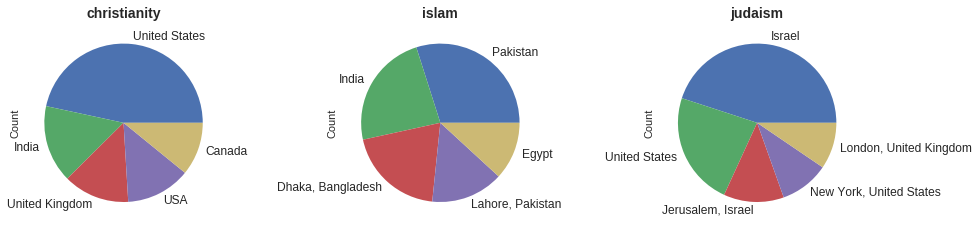

In [263]:
import matplotlib.pyplot as plt
import pylab
import numpy as np

fig = plt.figure()

ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
ax2 = fig.add_axes([0.55, .0, .5, .5], aspect=1)
ax3 = fig.add_axes([1.10, .0, .5, .5], aspect=1)

axes = []

axes.append(ax1)
axes.append(ax2)
axes.append(ax3)

i=0

for key, elem in location_dict.items():
    axes[i].set_title(key, weight='bold', size=14)
    plot = elem.plot(kind='pie',y='Count',labels=elem['Location'],legend=False,startangle=0,fontsize=12,ax=axes[i])
    i=i+1
    
plt.show()

# Query 2.1
Tym razem porównujemy posty: najpierw sprawdzimy, jakie tagi mają posty które otrzymują odpowiedzi najszybciej

In [264]:
# tutaj byc moze mozna uzyc iterowania po slownikach i podmieniac tylko nazwe <history> a reszta będzie taka sama

posts_and_comments = pd.merge(humanist['history']['Posts'][['Id','Title','Tags','Score','CreationDate']],humanist['history']['Comments'][['PostId','CreationDate']],left_on='Id',right_on='PostId').rename(columns={'CreationDate_x' : 'PostCreationDate','CreationDate_y':'CommentCreationDate'}).drop('PostId',axis=1)
posts_and_comments['PostCreationDate'] = pd.to_datetime(posts_and_comments['PostCreationDate'],format='%Y-%m-%d %H:%M')
posts_and_comments['CommentCreationDate'] = pd.to_datetime(posts_and_comments['CommentCreationDate'],format='%Y-%m-%d %H:%M')
posts_and_comments

,Id,Title,Tags,Score,PostCreationDate,CommentCreationDate
0,1,What factors related to the Eastern Crisis con...,<20th-century><world-war-one>,17,2011-10-11 19:30:14.017,2011-10-11 19:34:45.767
1,1,What factors related to the Eastern Crisis con...,<20th-century><world-war-one>,17,2011-10-11 19:30:14.017,2011-10-11 19:35:27.270
2,1,What factors related to the Eastern Crisis con...,<20th-century><world-war-one>,17,2011-10-11 19:30:14.017,2011-10-11 19:36:36.070
3,1,What factors related to the Eastern Crisis con...,<20th-century><world-war-one>,17,2011-10-11 19:30:14.017,2011-10-11 20:12:24.243
4,1,What factors related to the Eastern Crisis con...,<20th-century><world-war-one>,17,2011-10-11 19:30:14.017,2011-10-12 06:55:24.913
5,1,What factors related to the Eastern Crisis con...,<20th-century><world-war-one>,17,2011-10-11 19:30:14.017,2012-04-27 14:50:42.790
6,1,What factors related to the Eastern Crisis con...,<20th-century><world-war-one>,17,2011-10-11 19:30:14.017,2012-05-16 15:25:07.287
7,1,What factors related to the Eastern Crisis con...,<20th-century><world-war-one>,17,2011-10-11 19:30:14.017,2012-05-16 15:26:41.200
8,2,What language(s) were spoken within the Holy R...,<holy-roman-empire><language>,32,2011-10-11 19:31:39.163,2011-10-25 20:39:48.323
9,2,What language(s) were spoken within the Holy R...,<holy-roman-empire><language>,32,2011-10-11 19:31:39.163,2011-10-26 06:38:50.977


Dodatkowa kolumna obliczająca różnicę czasu pomiędzy pojawieniem się posta a pierwszym komentarzem 

In [20]:
# zostawienie tylko pierwszego komentarza
posts_and_comments = posts_and_comments.groupby('Id').first().reset_index()

# roznica czasu obliczana w minutach, zero miejsc po przecinku zeby nie bylo zbyt duzej roznorodnosci
posts_and_comments['TimeDifference'] = (posts_and_comments.CommentCreationDate - posts_and_comments.PostCreationDate)/ np.timedelta64(60,'m')
posts_and_comments['TimeDifference'] = np.round(posts_and_comments['TimeDifference'], decimals=0)
posts_and_comments = posts_and_comments.sort_values(by='TimeDifference')

In [21]:
posts_and_comments.groupby(['TimeDifference','Tags']).size().rename('Popularity').reset_index().sort_values(by=['Popularity','TimeDifference'],ascending=[False,True])

,TimeDifference,Tags,Popularity
1017,0.0,<world-war-two>,15
861,0.0,<united-states>,13
1899,1.0,<world-war-two>,10
117,0.0,<ancient-history>,8
960,0.0,<war>,8
297,0.0,<cultural-history>,6
551,0.0,<middle-ages>,6
1578,1.0,<military>,6
342,0.0,<england>,5
446,0.0,<historiography>,5


Można to porównać z najpopularniejszymi tagami

In [23]:
most_popular_tags = humanist['history']['Posts'].groupby(['Tags']).size().rename('TagsPopularity').reset_index().sort_values(by='TagsPopularity',ascending=False)
most_popular_tags

,Tags,TagsPopularity
6916,<world-war-two>,92
5740,<united-states>,68
827,<ancient-history>,44
4057,<military>,41
1225,<ancient-rome>,39
6830,<world-war-one>,37
3612,<middle-ages>,36
2962,<historiography>,28
662,<american-civil-war>,26
6549,<war>,24


# Query 2.2.
O jakich porach dnia posty najszybciej otrzymują odpowiedź?

In [95]:
# czas stworzenia postu i komentarza zamieniono na samą godzinę, jednak kolumna TimeDifference pozostaje niezmieniona

posts_and_comments_2 = posts_and_comments.copy()

from datetime import datetime

posts_and_comments_2['PostCreationDate'] = pd.to_datetime(posts_and_comments_2['PostCreationDate'],format='%H:%M:%S').dt.hour
posts_and_comments_2['CommentCreationDate'] = pd.to_datetime(posts_and_comments_2['CommentCreationDate'],format='%H:%M:%S').dt.hour
posts_and_comments_2.head(5)


,Id,Title,Tags,Score,PostCreationDate,CommentCreationDate,TimeDifference
1318,2168,Based on historical experience what would happ...,<united-states><europe><economy><political-his...,4,21,18,-3.0
0,1,What factors related to the Eastern Crisis con...,<20th-century><world-war-one>,17,19,19,0.0
5816,13062,NaN,NaN,8,18,18,0.0
5815,13061,Can the current monarch in UK be overthrown or...,<united-kingdom><monarchy>,4,17,18,0.0
5813,13058,NaN,NaN,4,11,12,0.0


In [96]:
# O jakiej godzinie w ciągu dnia pojawia się najwięcej "szybkich odpowiedzi na post"
# czyli takich, które gdzie pierwszy komentarz pojawił się po maksymalnie godzinie

posts_and_comments_2 = posts_and_comments_2.query('TimeDifference in (0.0,0.1)').groupby('PostCreationDate').size().rename('Count').reset_index().sort_values(by='PostCreationDate')
posts_and_comments_2 = posts_and_comments_2.rename({"PostCreationDate" : "PostCreationHour"})

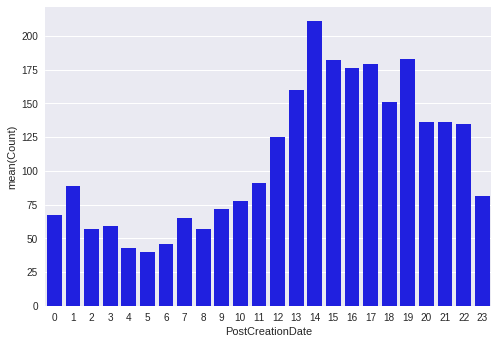

In [92]:
import seaborn as sns

# wykres dla pojedynczego forum 

ax = sns.barplot(x=posts_and_comments_2.PostCreationDate,y=posts_and_comments_2.Count,color="blue")
plt.show()

In [272]:
from datetime import datetime

# przygotowanie słownika dataframe'ów dla wszystkich forum
fastAnswers_dict = {}

for key, elem in beliefs.items():
    posts_and_comments = pd.merge(elem['Posts'][['Id','Title','Tags','Score','CreationDate']],elem['Comments'][['PostId','CreationDate']],left_on='Id',right_on='PostId').rename(columns={'CreationDate_x' : 'PostCreation','CreationDate_y':'CommentCreation'}).drop('PostId',axis=1)
    posts_and_comments['PostCreation'] = pd.to_datetime(posts_and_comments['PostCreation'],format='%Y-%m-%d %H:%M')
    posts_and_comments['CommentCreation'] = pd.to_datetime(posts_and_comments['CommentCreation'],format='%Y-%m-%d %H:%M')

    # zostawienie tylko pierwszego komentarza
    posts_and_comments = posts_and_comments.groupby('Id').first().reset_index()

    # roznica czasu obliczana w minutach, zero miejsc po przecinku zeby nie bylo zbyt duzej roznorodnosci
    posts_and_comments['TimeDifference'] = (posts_and_comments.CommentCreation - posts_and_comments.PostCreation)/ np.timedelta64(60,'m')
    posts_and_comments['TimeDifference'] = np.round(posts_and_comments['TimeDifference'], decimals=0)
    posts_and_comments = posts_and_comments.sort_values(by='TimeDifference')
    
    posts_and_comments_2 = posts_and_comments.copy()
    
    posts_and_comments_2['PostCreation'] = pd.to_datetime(posts_and_comments_2['PostCreation']).dt.hour
    posts_and_comments_2['CommentCreation'] = pd.to_datetime(posts_and_comments_2['CommentCreation']).dt.hour

    posts_and_comments_2 = posts_and_comments_2.query('TimeDifference in (0.0,0.1)').groupby('PostCreation').size().rename('Count').reset_index().sort_values(by='PostCreation')
    fastAnswers_dict[key] = posts_and_comments_2


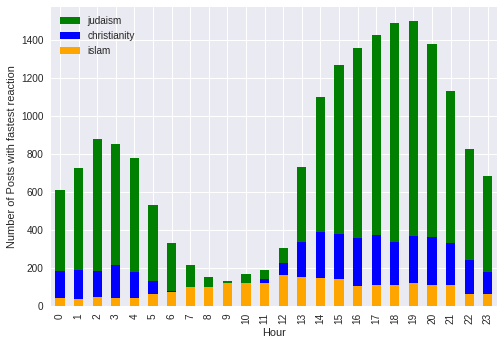

In [275]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)

fastAnswers_dict['judaism'].plot(x=["PostCreation"], y=["Count"], kind="bar",ax=ax1,color='green')
fastAnswers_dict['christianity'].plot(x=["PostCreation"], y=["Count"], kind="bar",ax=ax1,color='blue')
fastAnswers_dict['islam'].plot(x=["PostCreation"], y=["Count"], kind="bar",ax=ax1,color='orange')

ax1.legend(["judaism", "christianity","islam"]);
ax1.set_xlabel("Hour")
ax1.set_ylabel("Number of Posts with fastest reaction")

plt.show()

# Query 3
Które forum rozrastało się najszybciej?

In [197]:
posts_creationDate = history['Posts'][['Id','CreationDate']].reset_index(drop=True)
posts_creationDate['CreationDate'] = pd.to_datetime(posts_creationDate['CreationDate'])
posts_creationDate['CreationDate'] = posts_creationDate.CreationDate.dt.to_period('M')
posts_creationDate = posts_creationDate.groupby('CreationDate').size().rename('NumberOfPostsPerMonth').reset_index()

In [67]:
forumGrowth_dict = {}
for key, elem in humanist.items():
    posts_creationDate = elem['Posts']['CreationDate'].reset_index()
    posts_creationDate['CreationDate'] = pd.to_datetime(posts_creationDate['CreationDate'])
    posts_creationDate['CreationDate'] = posts_creationDate.CreationDate.dt.to_period('M')
    forumGrowth_dict[key] = posts_creationDate.groupby('CreationDate').size().rename('NumberOfPostsPerMonth').reset_index()


In [68]:
forumGrowth_dict['politics']

,CreationDate,NumberOfPostsPerMonth
0,2012-12,589
1,2013-01,239
2,2013-02,111
3,2013-03,106
4,2013-04,141
5,2013-05,112
6,2013-06,97
7,2013-07,111
8,2013-08,103
9,2013-09,127


In [99]:
for key, elem in beliefs.items():
    posts_creationDate = elem['Posts']['CreationDate'].reset_index()
    posts_creationDate['CreationDate'] = pd.to_datetime(posts_creationDate['CreationDate'])
    posts_creationDate['CreationDate'] = posts_creationDate.CreationDate.dt.to_period('M')
    forumGrowth_dict[key] = posts_creationDate.groupby('CreationDate').size().rename('NumberOfPostsPerMonth').reset_index()

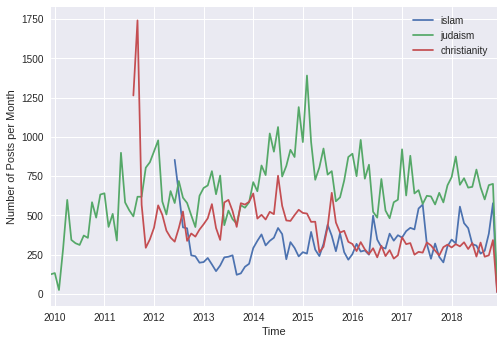

In [270]:
ax = forumGrowth_dict['islam'].plot(x='CreationDate', y='NumberOfPostsPerMonth', marker='',label="islam")
forumGrowth_dict['judaism'].plot(x='CreationDate', y='NumberOfPostsPerMonth', marker='',label="judaism",ax=ax)
forumGrowth_dict['christianity'].plot(x='CreationDate', y='NumberOfPostsPerMonth', marker='',label="christianity",ax=ax)
ax.set_xlabel("Time")
ax.set_ylabel("Number of Posts per Month")
plt.show()

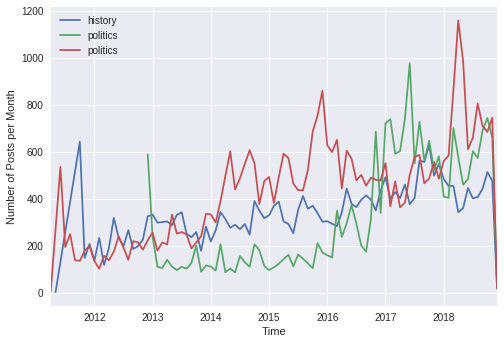

In [269]:
ax = forumGrowth_dict['history'].plot(x='CreationDate', y='NumberOfPostsPerMonth', marker='',label="history")
forumGrowth_dict['politics'].plot(x='CreationDate', y='NumberOfPostsPerMonth', marker='',label="politics",ax=ax)
forumGrowth_dict['philosophy'].plot(x='CreationDate', y='NumberOfPostsPerMonth', marker='',label="politics",ax=ax)
ax.set_xlabel("Time")
ax.set_ylabel("Number of Posts per Month")
plt.show()

# Query 4
Ile było komentarzy/odpowiedzi na dany wątek - czy są długie dyskusje?


In [134]:
commentCount_dict = {}
for key, elem in humanist.items():
    commentCount_dict[key] = elem['Comments'].groupby('PostId').size().rename('CommentCount').reset_index()['CommentCount'].mean()
for key, elem in beliefs.items():
    commentCount_dict[key] = elem['Comments'].groupby('PostId').size().rename('CommentCount').reset_index()['CommentCount'].mean()    

In [155]:
for key, elem in commentCount_dict.items():
    print(key)
    print(elem)

philosophy
4.448317463053126
history
4.012487428762991
politics
4.878919320857603
christianity
3.567217606505215
islam
2.601243898598646
judaism
4.155286885245902


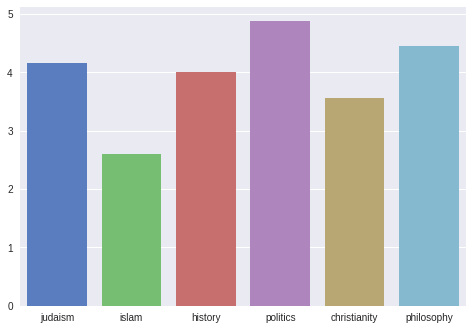

In [210]:
keys = list(set(commentCount_dict.keys()))
vals = [commentCount_dict[i] for i in keys]

ax = sns.barplot(x=keys,y=vals,palette="muted")
plt.show()

In [162]:
forums = []
comments_count_short = []
comments_count_long = []

for key,elem in humanist.items():
    comments_count = elem['Comments'].groupby('PostId').size().rename('CommentCount').reset_index()
    comments_count_short.append(comments_count.loc[(comments_count.CommentCount<4),['PostId','CommentCount']].reset_index(drop=True)['CommentCount'].count())
    comments_count_long.append(comments_count.loc[(comments_count.CommentCount>3),['PostId','CommentCount']].reset_index(drop=True)['CommentCount'].count())
    forums.append(key)

for key,elem in beliefs.items():
    comments_count = elem['Comments'].groupby('PostId').size().rename('CommentCount').reset_index()
    comments_count_short.append(comments_count.loc[(comments_count.CommentCount<4),['PostId','CommentCount']].reset_index(drop=True)['CommentCount'].count())
    comments_count_long.append(comments_count.loc[(comments_count.CommentCount>3),['PostId','CommentCount']].reset_index(drop=True)['CommentCount'].count())
    forums.append(key)
    
    
df = pd.DataFrame({'ForumName': forums,
                   'NumberOfShortDiscussions': comments_count_short,
                   'NumberOfLongDiscussions' :  comments_count_long })
df


,ForumName,NumberOfLongDiscussions,NumberOfShortDiscussions
0,philosophy,10469,12740
1,history,5181,6751
2,politics,8133,8005
3,christianity,8316,14312
4,islam,2872,9830
5,judaism,21692,27108


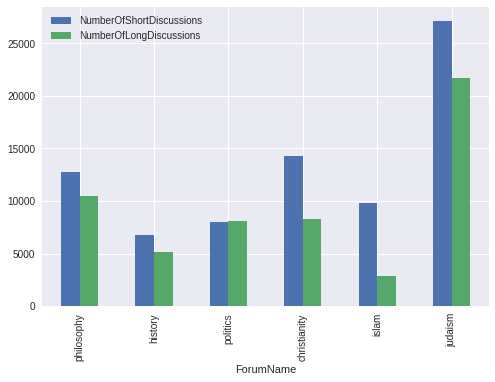

In [257]:
d_plot = df.plot(x="ForumName", y=["NumberOfShortDiscussions","NumberOfLongDiscussions"], kind="bar")
plt.show()